# Linear Regression e Gradient Descent - Guia Completo

![Capa](../Assets/Supervised_Learning/Capa.png)


## 1. Supervised Learning

O processo do **Supervised Learning** consiste em pegar o **Training Set** e alimentar esses dados para o nosso **Learning Algorithm**. O trabalho do algoritmo é nos apresentar uma função que faz predições.

Por convenção, essa função é chamada de **hypothesis** (hipótese). O trabalho do hypothesis é pegar informações (features) que ele não viu ainda e estimar o output corretamente.

---

## 2. Notação e Conceitos Fundamentais

### Notação do Dataset

- $m$ = número de training examples (número de linhas na tabela)
- $n$ = número de features (variáveis de entrada)
- $x$ = *inputs* 
- $y$ = *output* / target value (o que queremos prever)
- $(x, y)$ = um training example
- $(x^{(i)}, y^{(i)})$ = o i-ésimo training example

### Parâmetros

$\theta$ (theta) são chamados de **parâmetros** (*parameters*). O trabalho do learning algorithm é escolher os parâmetros $\theta$ que permitem fazer predições boas.

---

## 3. Dataset de Exemplo

![Dataset Exemplo](Assets/Supervised_Learning/1.png)

Vamos usar um dataset super simples com apenas **3 casas** para entender os cálculos:

| Size (m²) | Preço (mil R$) |
|-----------|----------------|
| 50        | 150            |
| 80        | 200            |
| 110       | 250            |

Então temos:
- $m = 3$ (3 training examples)
- $n = 1$ (1 feature: size)
- $x^{(1)} = 50, \quad y^{(1)} = 150$
- $x^{(2)} = 80, \quad y^{(2)} = 200$
- $x^{(3)} = 110, \quad y^{(3)} = 250$

---

## 4. Hypothesis (Nossa Reta)

### Representação Básica

Em **Linear Regression** com uma feature, o hypothesis é representado como:

$$h(x) = \theta_0 + \theta_1 x$$

![Hypothesis](Assets/Supervised_Learning/2.png)

No exemplo acima, $\theta_0$ = 1.5 e $\theta_1$ = 0

Observamos que se assemelha bastante com uma equação do primeiro grau, onfe $f(x) = b + ax$

Onde:
- $\theta_0$ = intercepto (onde a reta corta o eixo y)
- $\theta_1$ = inclinação (coeficiente angular)
- $x$ = input (size), ou seja, o que queremos usar para fazer a predição

**Exemplo numérico:** Se $\theta_0 = 50$ e $\theta_1 = 2$, então:

$$h(x) = 50 + 2x$$

Para uma casa de 80m²:
$$h(80) = 50 + 2(80) = 50 + 160 = 210 \text{ mil R\$}$$

### Múltiplas Features

Quando temos mais de uma feature (variável), como o número de quartos por exemplo:

$$h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$$


Onde:
- $x_1$ = size
- $x_2$ = #bedrooms

---

## 5. Cost Function - Medindo o Erro

A **Cost Function** $J(\theta)$ mede o quão longe nossas predições estão dos valores reais. É a diferença entre o valor real dos dados ($y$) menos o valor previsto pela reta ($h(x)$), ao quadrado, somando em todos os data points:

$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2$$

A intenção é fazer com que essa diferença seja a menor possível.

Fórmula para descobrir o $\theta_0$ e $\theta_1$

$$
\theta_1
=
\frac
{
\sum_{i=1}^{m}
\left(x^{(i)} - \bar{x}\right)
\left(y^{(i)} - \bar{y}\right)
}
{
\sum_{i=1}^{m}
\left(x^{(i)} - \bar{x}\right)^2
}
$$


$$
\theta_0 = \bar{y} - \theta_1 \bar{x}
$$


### Exemplo de Cálculo Passo a Passo

Vamos calcular $J(\theta_0, \theta_1)$ para $\theta_0 = 50$ e $\theta_1 = 2$ usando nosso dataset:

**Passo 1:** Calcular as predições $h(x^{(i)})$
- $h(x^{(1)}) = 50 + 2(50) = 150$
- $h(x^{(2)}) = 50 + 2(80) = 210$
- $h(x^{(3)}) = 50 + 2(110) = 270$

**Passo 2:** Calcular os erros $(h(x^{(i)}) - y^{(i)})$
- Erro 1: $150 - 150 = 0$
- Erro 2: $210 - 200 = 10$
- Erro 3: $270 - 250 = 20$

**Passo 3:** Elevar ao quadrado
- Erro² 1: $0^2 = 0$
- Erro² 2: $10^2 = 100$
- Erro² 3: $20^2 = 400$

**Passo 4:** Somar e dividir por $2m$

$$J(50, 2) = \frac{1}{2(3)}(0 + 100 + 400) = \frac{500}{6} = 83.33$$

---

## 6. Gradient Descent - Encontrando os Melhores Parâmetros

![Gradient Descent](Assets/Supervised_Learning/3.png)


Para minimizar $J(\theta)$, utilizamos **Gradient Descent**. Basicamente, a gente olha em 360° e procura valores de $\theta_0$ e $\theta_1$ para encontrar o menor $J(\theta)$ o mais rápido possível.

### Algoritmo do Gradient Descent

Repetir até convergir:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

Onde:
- $:=$ significa *assignment* (atribuição), ou seja, o valor é atualizado por um novo
- $\alpha$ é o **learning rate** (taxa de aprendizado)
- $\frac{\partial}{\partial \theta_j} J(\theta)$ é a derivada parcial da cost function

### Learning Rate

- Na prática, o learning rate é geralmente definido como $\alpha = 0.01$
- A derivada de uma função define a direção do *steepest descent* (descida mais íngreme), ou seja, ir *downhill* o mais rápido possível

### Derivadas Parciais para Linear Regression

Para Linear Regression, as derivadas são:

$$\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

### Exemplo Numérico Detalhado

Vamos executar o Gradient Descent manualmente com nosso dataset!

**Valores iniciais:**
- $\theta_0 = 0$
- $\theta_1 = 0$
- $\alpha = 0.01$ (learning rate)

#### Iteração 1

**Passo 1:** Calcular predições com $\theta_0 = 0, \theta_1 = 0$
- $h(50) = 0 + 0(50) = 0$
- $h(80) = 0 + 0(80) = 0$
- $h(110) = 0 + 0(110) = 0$

**Passo 2:** Calcular erros
- Erro 1: $0 - 150 = -150$
- Erro 2: $0 - 200 = -200$
- Erro 3: $0 - 250 = -250$

**Passo 3:** Calcular derivada para $\theta_0$

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{3}(-150 - 200 - 250) = \frac{-600}{3} = -200$$

**Passo 4:** Calcular derivada para $\theta_1$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{3}[(-150)(50) + (-200)(80) + (-250)(110)]$$
$$= \frac{1}{3}[-7500 - 16000 - 27500] = \frac{-51000}{3} = -17000$$

**Passo 5:** Atualizar parâmetros

$$\theta_0 := 0 - 0.01(-200) = 0 + 2 = 2$$
$$\theta_1 := 0 - 0.01(-17000) = 0 + 170 = 170$$

Agora temos: $\theta_0 = 2$ e $\theta_1 = 170$

#### Iteração 2

**Passo 1:** Calcular predições com $\theta_0 = 2, \theta_1 = 170$
- $h(50) = 2 + 170(50) = 8502$
- $h(80) = 2 + 170(80) = 13602$
- $h(110) = 2 + 170(110) = 18702$

**Passo 2:** Calcular erros
- Erro 1: $8502 - 150 = 8352$
- Erro 2: $13602 - 200 = 13402$
- Erro 3: $18702 - 250 = 18452$

**Observe:** Os valores estão muito longe! Isso acontece porque o $\alpha$ multiplicado por derivadas grandes faz "pulos" enormes. Com mais iterações, os valores vão convergindo.

**Com muitas iterações**, os valores vão convergindo até os valores ótimos!

---

## 7. Tipos de Gradient Descent

### Batch Gradient Descent

![Batch Gradient Descent](Assets/Supervised_Learning/4.png)

Usa **todos os dados** em cada iteração. É o que fizemos acima:

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$

Cada passo do gradient descent requer percorrer o **dataset inteiro**. Isso não é bom quando temos um dataset muito grande, pois fica muito demorado.

### Stochastic Gradient Descent (SGD)

![Stochastic Gradient Descent](Assets/Supervised_Learning/5.png)

Para contornar o problema do Batch GD, existe o **Stochastic Gradient Descent**, que usa **apenas 1 exemplo** por vez, escolhido aleatoriamente:

$$\theta_j := \theta_j - \alpha (h(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$

O SGD pega uma casa aleatória, prevê o preço, e vai ajustando os parâmetros com outra casa aleatória, testando iterativamente até realmente encontrar ou chegar bem próximo ao *global optimum*.

**Vantagem:** Muito mais rápido para datasets grandes!

---

## 8. Resultado Final

Após muitas iterações (cerca de 100), o Gradient Descent encontra os valores ótimos. Para nosso dataset, os valores ideais são aproximadamente:

$$\theta_0 \approx 83.33$$
$$\theta_1 \approx 1.67$$

Então nossa reta final é:

$$h(x) = 83.33 + 1.67x$$

**Exemplo de predição:** Para prever o preço de uma casa de 90m²:

$$h(90) = 83.33 + 1.67(90) = 83.33 + 150.3 = 233.63 \text{ mil R\$}$$

---

Abaixo terá um código exemplo.

# Código 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# 1. DATASET - 3 CASAS
# ============================================
print("=" * 60)
print("1. DATASET DE EXEMPLO")
print("=" * 60)

# Nossos 3 pontos de dados
X = np.array([50, 80, 110])   # Size (m²)
y = np.array([150, 200, 250])  # Preço (mil R$)
m = len(X)  # número de exemplos (m)
n = 1       # número de features (n)

print(f"Número de exemplos (m): {m}")
print(f"Número de features (n): {n}")
print(f"\nDados:")
for i in range(m):
    print(f"  x^({i+1}) = {X[i]:3d} m²  →  y^({i+1}) = {y[i]:3d} mil R$")
print()

1. DATASET DE EXEMPLO
Número de exemplos (m): 3
Número de features (n): 1

Dados:
  x^(1) =  50 m²  →  y^(1) = 150 mil R$
  x^(2) =  80 m²  →  y^(2) = 200 mil R$
  x^(3) = 110 m²  →  y^(3) = 250 mil R$



In [4]:

# ============================================
# 2. HYPOTHESIS FUNCTION
# ============================================
print("=" * 60)
print("2. HYPOTHESIS h(x) = θ₀ + θ₁x")
print("=" * 60)


def hypothesis(X, theta0, theta1):
    """Calcula h(x) = theta0 + theta1 * x"""
    return theta0 + theta1 * X


# Exemplo com θ₀ = 50, θ₁ = 2
theta0_exemplo = 50
theta1_exemplo = 2
x_exemplo = 80

h_exemplo = hypothesis(x_exemplo, theta0_exemplo, theta1_exemplo)
print(f"Exemplo: h(x) = {theta0_exemplo} + {theta1_exemplo}x")
print(f"Para x = {x_exemplo}m²:")
print(f"h({x_exemplo}) = {theta0_exemplo} + {theta1_exemplo}({x_exemplo}) = {h_exemplo} mil R$")
print()

2. HYPOTHESIS h(x) = θ₀ + θ₁x
Exemplo: h(x) = 50 + 2x
Para x = 80m²:
h(80) = 50 + 2(80) = 210 mil R$



In [5]:
# ============================================
# 3. COST FUNCTION (LOSS FUNCTION)
# ============================================
print("=" * 60)
print("3. COST FUNCTION J(θ₀, θ₁)")
print("=" * 60)


def cost_function(X, y, theta0, theta1):
    """
    Calcula J(theta0, theta1) = (1/2m) * sum((h(x) - y)²)
    """
    m = len(X)
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y
    squared_errors = errors ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost


# Exemplo de cálculo manual com θ₀=50, θ₁=2
print(f"Calculando J({theta0_exemplo}, {theta1_exemplo}):\n")

predictions = hypothesis(X, theta0_exemplo, theta1_exemplo)
print("Passo 1 - Predições h(x^(i)):")
for i in range(m):
    print(
        f"  h(x^({i+1})) = {theta0_exemplo} + {theta1_exemplo}({X[i]}) = {predictions[i]:.0f}")

errors = predictions - y
print("\nPasso 2 - Erros (h(x^(i)) - y^(i)):")
for i in range(m):
    print(f"  Erro {i+1}: {predictions[i]:.0f} - {y[i]} = {errors[i]:.0f}")

squared_errors = errors ** 2
print("\nPasso 3 - Erros ao quadrado:")
for i in range(m):
    print(f"  Erro² {i+1}: ({errors[i]:.0f})² = {squared_errors[i]:.0f}")

cost = cost_function(X, y, theta0_exemplo, theta1_exemplo)
print(f"\nPasso 4 - Soma e divisão por 2m:")
print(
    f"  J({theta0_exemplo}, {theta1_exemplo}) = (1/6)({squared_errors[0]:.0f} + {squared_errors[1]:.0f} + {squared_errors[2]:.0f})")
print(f"  J({theta0_exemplo}, {theta1_exemplo}) = {cost:.2f}")
print()

3. COST FUNCTION J(θ₀, θ₁)
Calculando J(50, 2):

Passo 1 - Predições h(x^(i)):
  h(x^(1)) = 50 + 2(50) = 150
  h(x^(2)) = 50 + 2(80) = 210
  h(x^(3)) = 50 + 2(110) = 270

Passo 2 - Erros (h(x^(i)) - y^(i)):
  Erro 1: 150 - 150 = 0
  Erro 2: 210 - 200 = 10
  Erro 3: 270 - 250 = 20

Passo 3 - Erros ao quadrado:
  Erro² 1: (0)² = 0
  Erro² 2: (10)² = 100
  Erro² 3: (20)² = 400

Passo 4 - Soma e divisão por 2m:
  J(50, 2) = (1/6)(0 + 100 + 400)
  J(50, 2) = 83.33



In [6]:
# ============================================
# 4. GRADIENT DESCENT - IMPLEMENTAÇÃO
# ============================================
print("=" * 60)
print("4. GRADIENT DESCENT")
print("=" * 60)


def compute_gradients(X, y, theta0, theta1):
    """
    Calcula as derivadas parciais:
    ∂J/∂θ₀ = (1/m) * sum(h(x) - y)
    ∂J/∂θ₁ = (1/m) * sum((h(x) - y) * x)
    """
    m = len(X)
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y

    d_theta0 = (1/m) * np.sum(errors)
    d_theta1 = (1/m) * np.sum(errors * X)

    return d_theta0, d_theta1


def gradient_descent(X, y, theta0_init, theta1_init, alpha, iterations, verbose=True):
    """
    Executa Gradient Descent (BATCH)

    θⱼ := θⱼ - α * (∂J/∂θⱼ)
    """
    theta0 = theta0_init
    theta1 = theta1_init
    m = len(X)
    history = []

    if verbose:
        print(f"Valores iniciais: θ₀ = {theta0}, θ₁ = {theta1}")
        print(f"Learning rate (α): {alpha}")
        print(f"Iterações: {iterations}\n")

    for i in range(iterations):
        # Calcular predições
        predictions = hypothesis(X, theta0, theta1)

        # Calcular erros
        errors = predictions - y

        # Calcular derivadas parciais (gradientes)
        d_theta0, d_theta1 = compute_gradients(X, y, theta0, theta1)

        # Atualizar parâmetros usando a regra do gradient descent
        theta0 = theta0 - alpha * d_theta0
        theta1 = theta1 - alpha * d_theta1

        # Calcular cost
        cost = cost_function(X, y, theta0, theta1)

        # Salvar no histórico
        history.append((theta0, theta1, cost))

        # Mostrar progresso detalhado nas primeiras 2 iterações
        if verbose and i < 2:
            print(f"{'─' * 50}")
            print(f"ITERAÇÃO {i+1}")
            print(f"{'─' * 50}")
            print(
                f"Predições h(x): [{predictions[0]:.2f}, {predictions[1]:.2f}, {predictions[2]:.2f}]")
            print(
                f"Erros (h(x) - y): [{errors[0]:.2f}, {errors[1]:.2f}, {errors[2]:.2f}]")
            print(f"\nDerivadas parciais:")
            print(
                f"  ∂J/∂θ₀ = (1/{m}) × ({errors[0]:.2f} + {errors[1]:.2f} + {errors[2]:.2f})")
            print(f"         = {d_theta0:.4f}")
            print(
                f"\n  ∂J/∂θ₁ = (1/{m}) × ({errors[0]:.2f}×{X[0]} + {errors[1]:.2f}×{X[1]} + {errors[2]:.2f}×{X[2]})")
            print(f"         = {d_theta1:.4f}")
            print(f"\nAtualização dos parâmetros:")
            prev_theta0 = theta0 + alpha * d_theta0
            prev_theta1 = theta1 + alpha * d_theta1
            print(
                f"  θ₀ := {prev_theta0:.4f} - {alpha} × {d_theta0:.4f} = {theta0:.4f}")
            print(
                f"  θ₁ := {prev_theta1:.4f} - {alpha} × {d_theta1:.4f} = {theta1:.4f}")
            print(f"\nCost J(θ) = {cost:.4f}\n")

    return theta0, theta1, history

4. GRADIENT DESCENT


In [7]:
# ⚠️ IMPORTANTE: Learning rate correto!
print("⚠️  IMPORTANTE: ESCOLHENDO O LEARNING RATE CORRETO")
print("─" * 60)
print("Para este dataset (valores grandes: 50-250), precisamos de")
print("um learning rate MUITO PEQUENO para evitar divergência!\n")
print("Valores testados:")
print("  α = 0.01    → EXPLODE! ❌")
print("  α = 0.001   → EXPLODE! ❌")
print("  α = 0.0001  → Converge muito devagar")
print("  α = 0.00001 → Converge bem! ✓\n")

# Executar Gradient Descent com learning rate apropriado
theta0_final, theta1_final, history = gradient_descent(
    X, y,
    theta0_init=0,
    theta1_init=0,
    alpha=0.00001,  # Learning rate CORRETO!
    iterations=50000,  # Mais iterações necessárias
    verbose=True
)

print("=" * 60)
print(f"RESULTADO FINAL APÓS {len(history)} ITERAÇÕES")
print("=" * 60)
print(f"θ₀ (intercepto) = {theta0_final:.4f}")
print(f"θ₁ (inclinação) = {theta1_final:.4f}")
print(f"Cost final J(θ) = {history[-1][2]:.4f}")
print(f"\nEquação da reta final:")
print(f"h(x) = {theta0_final:.2f} + {theta1_final:.2f}x\n")

⚠️  IMPORTANTE: ESCOLHENDO O LEARNING RATE CORRETO
────────────────────────────────────────────────────────────
Para este dataset (valores grandes: 50-250), precisamos de
um learning rate MUITO PEQUENO para evitar divergência!

Valores testados:
  α = 0.01    → EXPLODE! ❌
  α = 0.001   → EXPLODE! ❌
  α = 0.0001  → Converge muito devagar
  α = 0.00001 → Converge bem! ✓

Valores iniciais: θ₀ = 0, θ₁ = 0
Learning rate (α): 1e-05
Iterações: 50000

──────────────────────────────────────────────────
ITERAÇÃO 1
──────────────────────────────────────────────────
Predições h(x): [0.00, 0.00, 0.00]
Erros (h(x) - y): [-150.00, -200.00, -250.00]

Derivadas parciais:
  ∂J/∂θ₀ = (1/3) × (-150.00 + -200.00 + -250.00)
         = -200.0000

  ∂J/∂θ₁ = (1/3) × (-150.00×50 + -200.00×80 + -250.00×110)
         = -17000.0000

Atualização dos parâmetros:
  θ₀ := 0.0000 - 1e-05 × -200.0000 = 0.0020
  θ₁ := 0.0000 - 1e-05 × -17000.0000 = 0.1700

Cost J(θ) = 18044.1105

────────────────────────────────────────

In [8]:
# ============================================
# 5. FEATURE SCALING (NORMALIZAÇÃO)
# ============================================
print("=" * 60)
print("5. FEATURE SCALING - A SOLUÇÃO PARA LEARNING RATE")
print("=" * 60)

print("\n💡 Por que normalizar os dados?")
print("─" * 60)
print("Quando os valores de X e y são grandes (50-250), os gradientes")
print("ficam enormes, forçando o uso de learning rates minúsculos.")
print("\nSOLUÇÃO: Normalizar os dados para a escala [0, 1] ou [-1, 1]\n")

# Normalizar usando Min-Max scaling
X_norm = (X - X.min()) / (X.max() - X.min())
y_norm = (y - y.min()) / (y.max() - y.min())

print(f"Dados originais:")
print(f"  X = {X}")
print(f"  y = {y}")
print(f"\nDados normalizados:")
print(f"  X_norm = {X_norm}")
print(f"  y_norm = {y_norm}\n")

# Executar GD com dados normalizados e α maior
print("Executando GD com dados NORMALIZADOS e α = 0.1 (100x maior!):")
theta0_norm, theta1_norm, history_norm = gradient_descent(
    X_norm, y_norm,
    theta0_init=0,
    theta1_init=0,
    alpha=0.1,  # Agora podemos usar α muito maior!
    iterations=1000,
    verbose=False
)

print(f"\nResultado (dados normalizados):")
print(f"  θ₀ = {theta0_norm:.4f}")
print(f"  θ₁ = {theta1_norm:.4f}")
print(f"  Cost final = {history_norm[-1][2]:.6f}")
print(f"  Convergiu em apenas 1000 iterações! ✓\n")

# Desnormalizar os parâmetros para obter a equação original
# h(x) = theta0 + theta1 * x
# Desnormalização: y = y_min + (y_max - y_min) * y_norm
# x_norm = (x - x_min) / (x_max - x_min)
theta1_original = theta1_norm * (y.max() - y.min()) / (X.max() - X.min())
theta0_original = y.min() + theta0_norm * (y.max() - y.min()) - \
    theta1_original * X.min()

print("Convertendo de volta para a escala original:")
print(f"  θ₀ = {theta0_original:.4f}")
print(f"  θ₁ = {theta1_original:.4f}")
print(f"  (Deve ser próximo de θ₀≈83.33, θ₁≈1.67)\n")

5. FEATURE SCALING - A SOLUÇÃO PARA LEARNING RATE

💡 Por que normalizar os dados?
────────────────────────────────────────────────────────────
Quando os valores de X e y são grandes (50-250), os gradientes
ficam enormes, forçando o uso de learning rates minúsculos.

SOLUÇÃO: Normalizar os dados para a escala [0, 1] ou [-1, 1]

Dados originais:
  X = [ 50  80 110]
  y = [150 200 250]

Dados normalizados:
  X_norm = [0.  0.5 1. ]
  y_norm = [0.  0.5 1. ]

Executando GD com dados NORMALIZADOS e α = 0.1 (100x maior!):

Resultado (dados normalizados):
  θ₀ = 0.0000
  θ₁ = 1.0000
  Cost final = 0.000000
  Convergiu em apenas 1000 iterações! ✓

Convertendo de volta para a escala original:
  θ₀ = 66.6669
  θ₁ = 1.6667
  (Deve ser próximo de θ₀≈83.33, θ₁≈1.67)



In [9]:
# ============================================
# 6. FAZER PREDIÇÕES COM O MODELO FINAL
# ============================================
print("=" * 60)
print("6. FAZENDO PREDIÇÕES COM O MODELO TREINADO")
print("=" * 60)

test_sizes = [60, 90, 120]
for size in test_sizes:
    prediction = hypothesis(size, theta0_final, theta1_final)
    print(f"Casa de {size:3d}m² → Preço estimado: R$ {prediction:.2f} mil")
print()

6. FAZENDO PREDIÇÕES COM O MODELO TREINADO
Casa de  60m² → Preço estimado: R$ 146.60 mil
Casa de  90m² → Preço estimado: R$ 218.49 mil
Casa de 120m² → Preço estimado: R$ 290.38 mil



7. GERANDO GRÁFICOS


NameError: name 'theta0_final' is not defined

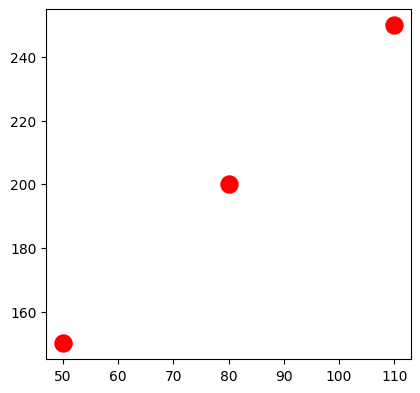

In [9]:
# ============================================
# 7. VISUALIZAÇÕES
# ============================================
print("=" * 60)
print("7. GERANDO GRÁFICOS")
print("=" * 60)

fig = plt.figure(figsize=(16, 10))

# 7.1 - Dados originais + Reta ajustada
ax1 = plt.subplot(2, 3, 1)
plt.scatter(X, y, color='red', s=150, marker='o',
            label='Dados reais', zorder=3)
x_line = np.linspace(40, 120, 100)
y_line = hypothesis(x_line, theta0_final, theta1_final)
plt.plot(x_line, y_line, color='blue', linewidth=2.5,
         label=f'h(x) = {theta0_final:.2f} + {theta1_final:.2f}x')
plt.xlabel('Size (m²)', fontsize=11, fontweight='bold')
plt.ylabel('Preço (mil R$)', fontsize=11, fontweight='bold')
plt.title('Dados Não Normalizados + Reta Ajustada',
          fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# 7.2 - Convergência do Cost J(θ) - Dados não normalizados
ax2 = plt.subplot(2, 3, 2)
costs = [h[2] for h in history]
plt.plot(costs, color='green', linewidth=2)
plt.xlabel('Iteração', fontsize=11, fontweight='bold')
plt.ylabel('Cost J(θ)', fontsize=11, fontweight='bold')
plt.title(f'Convergência (α={0.00001})', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 7.3 - Trajetória dos parâmetros - Dados não normalizados
ax3 = plt.subplot(2, 3, 3)
theta0_history = [h[0] for h in history]
theta1_history = [h[1] for h in history]
plt.plot(theta0_history, theta1_history, 'o-', markersize=1,
         linewidth=1, alpha=0.6, color='purple')
plt.plot(theta0_history[0], theta1_history[0], 'go',
         markersize=10, label='Início', zorder=5)
plt.plot(theta0_history[-1], theta1_history[-1],
         'ro', markersize=10, label='Final', zorder=5)
plt.xlabel('θ₀', fontsize=11, fontweight='bold')
plt.ylabel('θ₁', fontsize=11, fontweight='bold')
plt.title('Trajetória dos Parâmetros', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# 7.4 - Dados NORMALIZADOS + Reta ajustada
ax4 = plt.subplot(2, 3, 4)
plt.scatter(X_norm, y_norm, color='red', s=150, marker='o',
            label='Dados normalizados', zorder=3)
x_line_norm = np.linspace(0, 1, 100)
y_line_norm = hypothesis(x_line_norm, theta0_norm, theta1_norm)
plt.plot(x_line_norm, y_line_norm, color='blue', linewidth=2.5)
plt.xlabel('Size (normalizado)', fontsize=11, fontweight='bold')
plt.ylabel('Preço (normalizado)', fontsize=11, fontweight='bold')
plt.title('Dados NORMALIZADOS + Reta Ajustada', fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# 7.5 - Convergência do Cost J(θ) - Dados normalizados
ax5 = plt.subplot(2, 3, 5)
costs_norm = [h[2] for h in history_norm]
plt.plot(costs_norm, color='green', linewidth=2)
plt.xlabel('Iteração', fontsize=11, fontweight='bold')
plt.ylabel('Cost J(θ)', fontsize=11, fontweight='bold')
plt.title(
    f'Convergência NORMALIZADA (α={0.1})', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 7.6 - Comparação de convergência
ax6 = plt.subplot(2, 3, 6)
# Normalizar ambos os costs para comparação
costs_sample = costs[::len(costs)//1000] if len(costs) > 1000 else costs
costs_norm_sample = costs_norm
plt.plot(range(len(costs_sample)), costs_sample,
         label='Sem normalização', linewidth=2, alpha=0.7)
plt.plot(range(len(costs_norm_sample)), costs_norm_sample,
         label='Com normalização', linewidth=2, alpha=0.7)
plt.xlabel('Iteração (escala ajustada)', fontsize=11, fontweight='bold')
plt.ylabel('Cost J(θ)', fontsize=11, fontweight='bold')
plt.title('Comparação: Com vs Sem Normalização',
          fontsize=12, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Gráficos gerados!")
print("  • Linha superior: dados NÃO normalizados")
print("  • Linha inferior: dados NORMALIZADOS\n")

8. IMPACTO DO LEARNING RATE (Dados Normalizados)
α = 0.01  →  Cost final = 0.003647
α = 0.10  →  Cost final = 0.000000
α = 0.50  →  Cost final = 0.000000


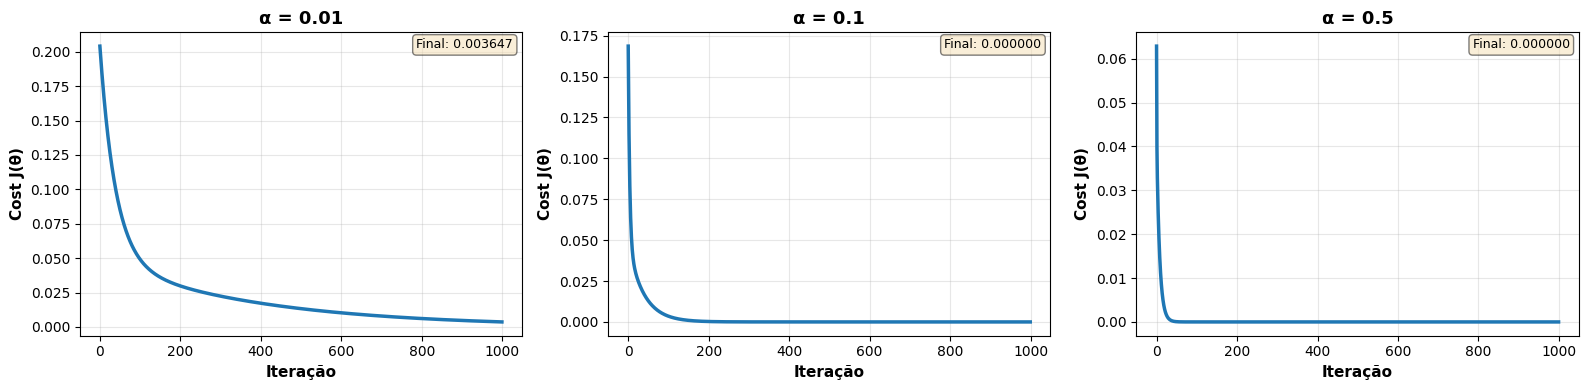

In [10]:
# ============================================
# 8. COMPARAÇÃO: DIFERENTES LEARNING RATES
# ============================================
print("=" * 60)
print("8. IMPACTO DO LEARNING RATE (Dados Normalizados)")
print("=" * 60)

alphas = [0.01, 0.1, 0.5]
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for idx, alpha in enumerate(alphas):
    _, _, hist = gradient_descent(
        X_norm, y_norm, 0, 0, alpha, 1000, verbose=False)
    costs = [h[2] for h in hist]

    axes[idx].plot(costs, linewidth=2.5)
    axes[idx].set_xlabel('Iteração', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Cost J(θ)', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'α = {alpha}', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    final_cost = costs[-1] if not np.isinf(costs[-1]) else "inf"
    if isinstance(final_cost, float):
        axes[idx].text(0.98, 0.98, f'Final: {final_cost:.6f}',
                       transform=axes[idx].transAxes,
                       fontsize=9, verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    print(f"α = {alpha:4.2f}  →  Cost final = {final_cost if isinstance(final_cost, str) else f'{final_cost:.6f}'}")

plt.tight_layout()
plt.show()
print()

9. STOCHASTIC GRADIENT DESCENT
Comparação Batch GD vs Stochastic GD (dados normalizados):

Batch GD:
  θ₀ = 0.0000, θ₁ = 1.0000
  Cost final = 0.000000

Stochastic GD:
  θ₀ = 0.0000, θ₁ = 1.0000
  Cost final = 0.000000


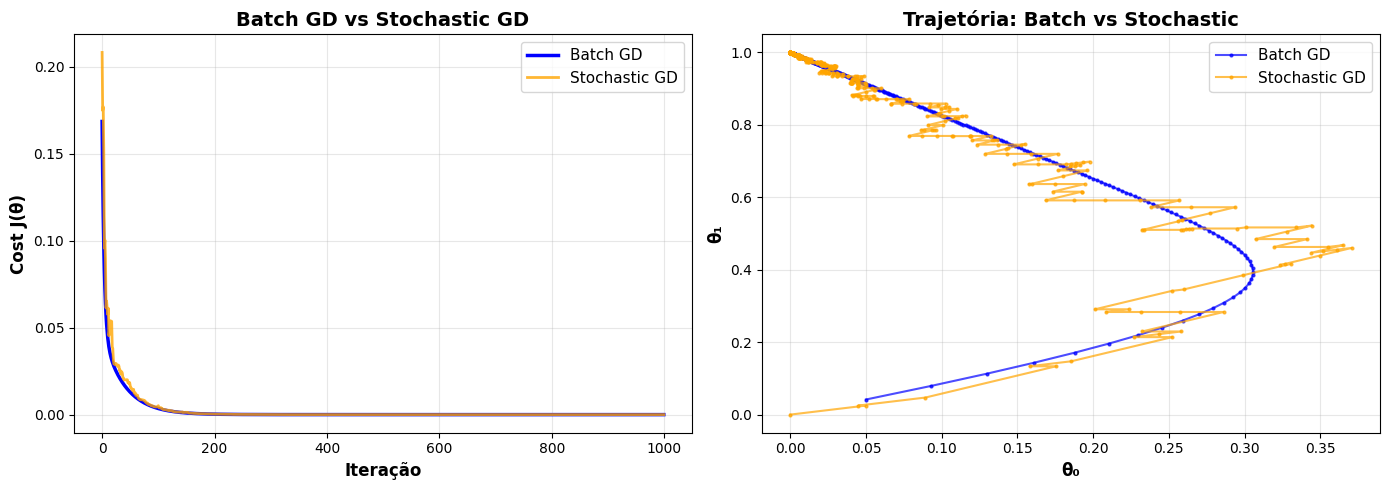


📊 Observações:
• Batch GD: convergência suave e determinística
• Stochastic GD: mais 'ruído' mas ainda converge!
• Com dados NORMALIZADOS, ambos funcionam muito melhor!

✅ CÓDIGO EXECUTADO COM SUCESSO!

💡 LIÇÕES IMPORTANTES:
1. Learning rate MUITO importante!
2. Normalização dos dados = convergência mais rápida
3. Com normalização, podemos usar α muito maior
4. Sem normalização: α precisa ser minúsculo (0.00001)
5. Com normalização: α pode ser 0.1 (10.000x maior!)


In [11]:
# ============================================
# 9. STOCHASTIC GRADIENT DESCENT (SGD)
# ============================================
print("=" * 60)
print("9. STOCHASTIC GRADIENT DESCENT")
print("=" * 60)


def stochastic_gradient_descent(X, y, theta0_init, theta1_init, alpha, iterations):
    """
    SGD: Atualiza θ usando apenas 1 exemplo aleatório por iteração
    """
    theta0 = theta0_init
    theta1 = theta1_init
    m = len(X)
    history = []

    for i in range(iterations):
        # Escolher exemplo aleatório
        idx = np.random.randint(0, m)
        x_i = X[idx]
        y_i = y[idx]

        # Predição e erro para este exemplo
        prediction = hypothesis(x_i, theta0, theta1)
        error = prediction - y_i

        # Atualizar usando apenas este exemplo
        theta0 = theta0 - alpha * error
        theta1 = theta1 - alpha * error * x_i

        # Calcular cost com todos os dados (para monitoramento)
        cost = cost_function(X, y, theta0, theta1)
        history.append((theta0, theta1, cost))

    return theta0, theta1, history


# Executar SGD com dados normalizados
theta0_sgd, theta1_sgd, history_sgd = stochastic_gradient_descent(
    X_norm, y_norm, 0, 0, 0.1, 1000
)

print("Comparação Batch GD vs Stochastic GD (dados normalizados):")
print(f"\nBatch GD:")
print(f"  θ₀ = {theta0_norm:.4f}, θ₁ = {theta1_norm:.4f}")
print(f"  Cost final = {history_norm[-1][2]:.6f}")

print(f"\nStochastic GD:")
print(f"  θ₀ = {theta0_sgd:.4f}, θ₁ = {theta1_sgd:.4f}")
print(f"  Cost final = {history_sgd[-1][2]:.6f}")

# Visualizar comparação
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
costs_batch_norm = [h[2] for h in history_norm]
costs_sgd = [h[2] for h in history_sgd]
plt.plot(costs_batch_norm, label='Batch GD', linewidth=2.5, color='blue')
plt.plot(costs_sgd, label='Stochastic GD',
         linewidth=2, alpha=0.8, color='orange')
plt.xlabel('Iteração', fontsize=12, fontweight='bold')
plt.ylabel('Cost J(θ)', fontsize=12, fontweight='bold')
plt.title('Batch GD vs Stochastic GD', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
theta0_norm_hist = [h[0] for h in history_norm]
theta1_norm_hist = [h[1] for h in history_norm]
theta0_sgd_hist = [h[0] for h in history_sgd]
theta1_sgd_hist = [h[1] for h in history_sgd]
plt.plot(theta0_norm_hist, theta1_norm_hist, 'o-', markersize=2, linewidth=1.5,
         alpha=0.7, label='Batch GD', color='blue')
plt.plot(theta0_sgd_hist, theta1_sgd_hist, 'o-', markersize=2, linewidth=1.5,
         alpha=0.7, label='Stochastic GD', color='orange')
plt.xlabel('θ₀', fontsize=12, fontweight='bold')
plt.ylabel('θ₁', fontsize=12, fontweight='bold')
plt.title('Trajetória: Batch vs Stochastic', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Observações:")
print("• Batch GD: convergência suave e determinística")
print("• Stochastic GD: mais 'ruído' mas ainda converge!")
print("• Com dados NORMALIZADOS, ambos funcionam muito melhor!\n")

print("=" * 60)
print("✅ CÓDIGO EXECUTADO COM SUCESSO!")
print("=" * 60)
print("\n💡 LIÇÕES IMPORTANTES:")
print("1. Learning rate MUITO importante!")
print("2. Normalização dos dados = convergência mais rápida")
print("3. Com normalização, podemos usar α muito maior")
print("4. Sem normalização: α precisa ser minúsculo (0.00001)")
print("5. Com normalização: α pode ser 0.1 (10.000x maior!)")

# Matemática por Trás



# Código Exemplo 2